In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:16pt;}
div.text_cell_render.rendered_html{font-size:16pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:16pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
table.dataframe{font-size:16px;}
</style>
"""))

# <b><font size="7" color="red">ch10. N차원 배열(Numpy 배열) 다루기</font></b>

# 4장 복사와 뷰
## 4.1 할당

In [3]:
import numpy as np
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
b = a

In [5]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 1566086425712, numpy.ndarray)

In [6]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [7]:
np.all(a==b)

True

## 4.2 얇은 복사 : 뷰(View

In [8]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [10]:
c = a.view()

In [11]:
c == a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [14]:
c.shape=(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [20]:
c[1, ::2] = 9
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3 깊은 복사

In [21]:
a = np.array([5, 4, 13, 1],
            [90, 6, 16, 1],
            [20, 5, 14, 0])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [27]:
X = a[:, :-1] # 슬라이싱이 될 때, 뷰가 반환됨(얕은복사)
X = a[:, :-1].copy() # 깊은 복사
X = np.array(a[:,:-1], copy=True) #깊은 복사
X

array([[-9,  1,  2],
       [-9,  5,  6],
       [-9,  9, 10]])

In [25]:
X[:,0] = -9
X

array([[-9,  1,  2],
       [-9,  5,  6],
       [-9,  9, 10]])

# 5장 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [4]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [5]:
a[[0,5,9]]

array([ 0, 25, 81])

In [6]:
# 인덱싱하기 위한 값을 배열로 만듬
i = np.array([0,1,1,9])
a[i] # 결과는 i(인덱싱 배열)의 형태로 따라 감

array([ 0,  1,  1, 81])

In [7]:
a[i] += 10 # 1번 인덱스는 한번만 10 증가
a

array([ 10,  11,   4,   9,  16,  25,  36,  49,  64,  91, 100, 121])

In [9]:
# 색상
palette = np.array([[0,0,0], # black
                    [255,0,0], # red
                    [0,255,0], # green
                   [0,0,255], # blue
                   [255,255,255]]) # white

In [17]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                       [4,0,0,4,4,4,4,0,0,4],
                       [4,0,4,4,4,4,4,4,0,4],
                       [0,4,4,1,4,4,3,4,4,0],
                       [0,4,4,1,4,4,3,4,4,0],
                       [0,4,4,4,4,4,4,4,4,0],
                       [0,4,4,2,4,4,2,4,4,0],
                       [4,0,4,4,2,2,4,4,0,4],
                       [4,4,0,4,4,4,4,0,4,4],
                       [4,4,4,0,0,0,0,4,4,4]])

In [18]:
image_data = palette[image_index]

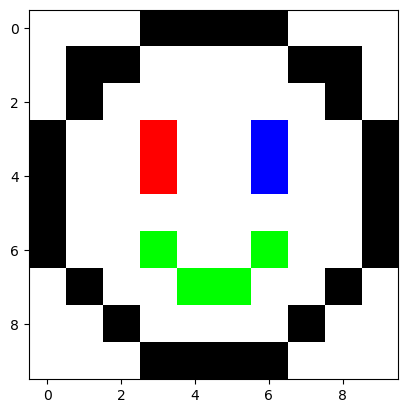

In [19]:
from matplotlib import pyplot as pit
%matplotlib inline
pit.imshow(image_data, interpolation='nearest')
pit.show()

## 5.2 논리 배열을 이용한 인덱싱

In [21]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [22]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [23]:
a[a%2==0] # 논리 배열을 이용한 인덱싱시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [24]:
a[a>15]

array([16, 17, 18, 19])

# 6장 선형대수
- 2차원 넘파이 배열을 행렬
    * 행렬곱 : @
    * 단위행렬 : np.eye(n) : n행n열 단위행렬
    * 전치행렬 : X.T, X.transpose()
    * 역행렬 : np.linalg.inv(X)

In [25]:
a = np.array([[1,2],[3,4]])

In [27]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [28]:
# 정방행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],[3,4,1]])
# np.linalg.inv(a) 에러
a.T @ a

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [30]:
# 전치행렬을 곱하면 정방행렬로
a@a.T

array([[ 6, 12],
       [12, 26]])